In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r'D:\btch 16\machinlerning_group\Fish.csv')
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.isnull().sum()


Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: xlabel='Height', ylabel='Weight'>

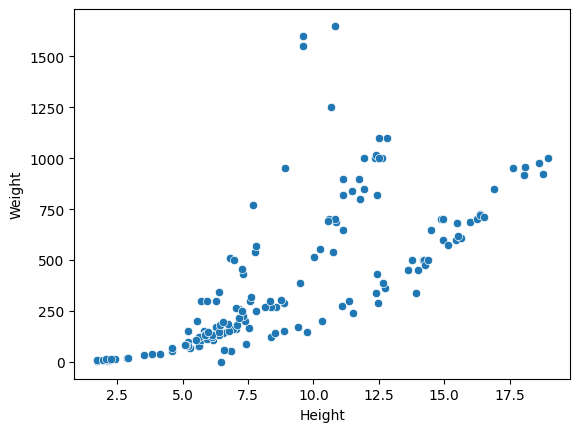

In [5]:
sns.scatterplot(x=df['Height'], y=df['Weight'])

In [6]:
df.select_dtypes(include="object").columns

Index(['Species'], dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Species']=Le.fit_transform(df["Species"])

In [8]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
x=df.drop(columns=["Weight"])
y=df['Weight']


In [10]:
x

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,5,11.5,12.2,13.4,2.0904,1.3936
155,5,11.7,12.4,13.5,2.4300,1.2690
156,5,12.1,13.0,13.8,2.2770,1.2558
157,5,13.2,14.3,15.2,2.8728,2.0672


In [11]:
y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
#model 1 multipal  linear regression
from sklearn.linear_model import LinearRegression
lin_rig=LinearRegression()
lin_rig.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred=lin_rig.predict(x_test)
y_pred[:10]

array([576.30046688, 204.06444496, 530.43968317, 667.76771365,
       377.89450144, 439.77687266, 184.06235028, 229.45337183,
       667.74342101, 384.53645654])

In [15]:
r2_score(y_test,y_pred)


0.8296480783839526

<Axes: xlabel='Weight'>

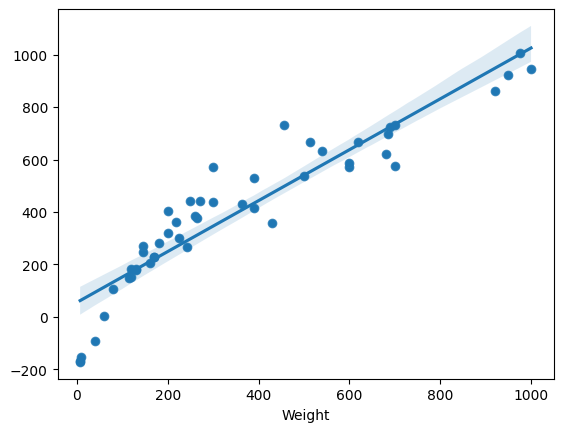

In [16]:
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x = y_test, y=y_pred)

In [17]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred)

112.75512653920912

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly_x = PolynomialFeatures()
lr2 = LinearRegression()

In [19]:
x_poly = poly_x.fit_transform(x)
poly_x.fit(x_poly,y)

,degree,2
,interaction_only,False
,include_bias,True
,order,'C'


In [20]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x_poly,y, test_size=0.3)

In [21]:
lr2.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
y_pred2 = lr2.predict(x_test)

In [23]:
y_pred2[:10]

array([332.75954142, 267.81485847, 117.15890053,   6.37141998,
       135.48042901, 272.52859691, 976.48210618, 703.69237338,
       321.4047187 ,  29.90274701])

In [24]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(y_test, y_pred2)

140.72607278535224

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)*100

86.92204116450935

<Axes: xlabel='Weight'>

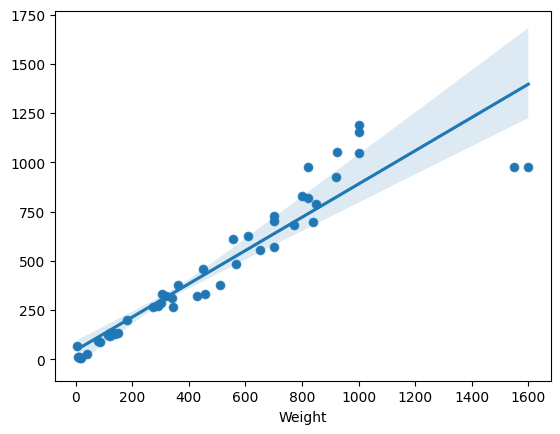

In [26]:
sns.scatterplot(x = y_test, y=y_pred2)
sns.regplot(x = y_test, y=y_pred2)

<Axes: ylabel='Weight'>

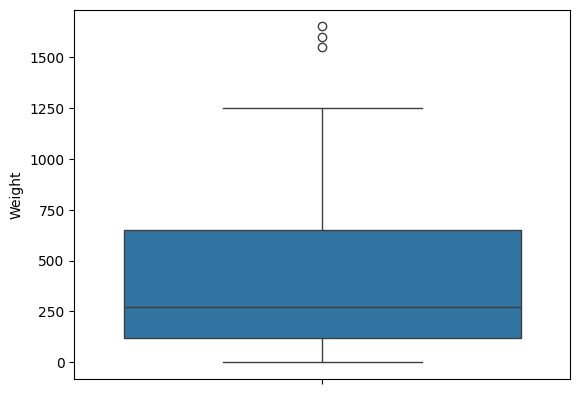

In [27]:
sns.boxplot(df['Weight'])

In [28]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [29]:
Q1= df['Weight'].quantile(0.25)
Q3=df['Weight'].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(530.0)

In [30]:
lower =Q1-1.5*IQR
upper =Q3+1.5*IQR

In [31]:
lower

np.float64(-675.0)

In [32]:
upper

np.float64(1445.0)

In [33]:
df.drop(df[df["Weight"]>upper].index ,inplace=True)
df.drop(df[df["Weight"]<lower].index, inplace=True)

In [34]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [1]:
df

NameError: name 'df' is not defined

In [36]:
df.describe()

,Species,Weight,Length1,Length2,Length3,Height,Width
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,2.250000,375.217308,25.655769,27.786538,30.571154,8.951128,4.375719
std,1.717556,319.546978,9.119630,9.792651,10.695359,4.324325,1.672188
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.000000,21.000000,23.025000,5.931675,3.369600
50%,2.000000,271.000000,25.000000,26.750000,29.250000,7.647800,4.243300
75%,4.000000,612.500000,32.125000,35.000000,39.425000,12.378550,5.424375
max,6.000000,1250.000000,52.000000,56.000000,59.700000,18.957000,8.142000
